# Fraud Analytics

# DATA EXPLORATION

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [5]:
data = pd.read_csv("creditcard.csv")

In [6]:
data.shape

(284807, 31)

In [7]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
cor1= data.corr() 

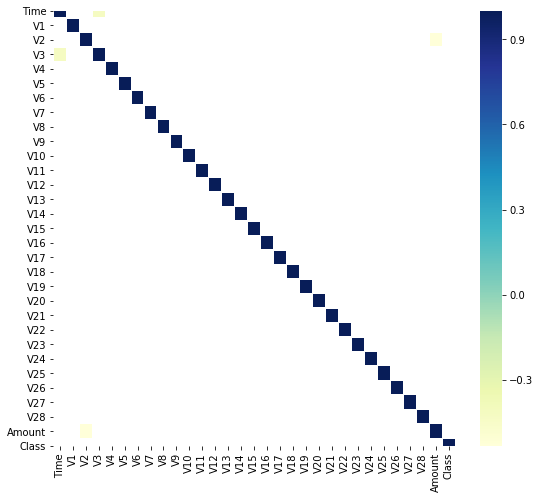

In [10]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(cor1[abs(cor1) > 0.41], ax = ax, cmap ="YlGnBu", linewidths = 0.1)


# DATA PREPROCESSING

In [11]:
data.dtypes == object
# Checking for Character Data Type

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [13]:
data.std() 
#Checking for Variance 

Time      47488.145955
V1            1.958696
V2            1.651309
V3            1.516255
V4            1.415869
V5            1.380247
V6            1.332271
V7            1.237094
V8            1.194353
V9            1.098632
V10           1.088850
V11           1.020713
V12           0.999201
V13           0.995274
V14           0.958596
V15           0.915316
V16           0.876253
V17           0.849337
V18           0.838176
V19           0.814041
V20           0.770925
V21           0.734524
V22           0.725702
V23           0.624460
V24           0.605647
V25           0.521278
V26           0.482227
V27           0.403632
V28           0.330083
Amount      250.120109
Class         0.041527
dtype: float64

In [14]:
data.isnull().sum()
# To check whether the dataset has missing values 

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

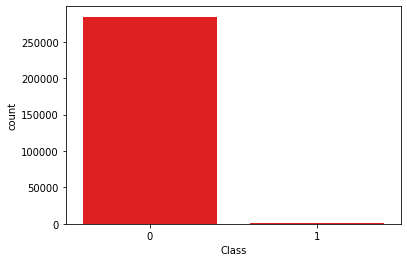

In [16]:
sns.countplot(x= "Class", data = data, color = "red")
#checking for imbalance on the dependent Variable 

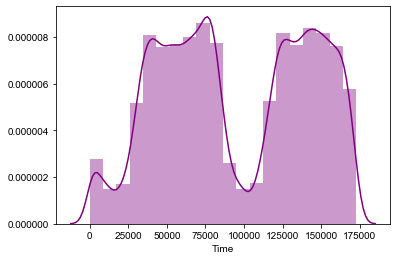

In [17]:
sns.distplot(data["Time"], bins = 20, color = "purple")
sns.set(style = "darkgrid")

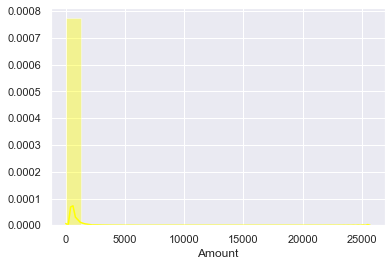

In [201]:
sns.distplot(data["Amount"], bins = 20 , color = "yellow")
sns.set(style = "white")

# Standardization of Continuous Variables 

In [18]:
from sklearn import preprocessing 
# Scaling the numerical Values as they are in different scales

In [19]:
numerical_val = list(set(data[["Time","Amount"]]))

In [20]:
new_col = [i+ "_ Standardized" for i in numerical_val]

In [21]:
array = data[numerical_val].values

In [22]:
data_scaler = preprocessing.StandardScaler().fit(array)

In [23]:
data[new_col] = pd.DataFrame(data_scaler.transform(array))

In [24]:
data.columns # New standardized columns are added 

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_ Standardized', 'Amount_ Standardized'],
      dtype='object')

In [25]:
data = data.drop(numerical_val, axis =1) 

In [26]:
data.mean()

V1                      3.919560e-15
V2                      5.688174e-16
V3                     -8.769071e-15
V4                      2.782312e-15
V5                     -1.552563e-15
V6                      2.010663e-15
V7                     -1.694249e-15
V8                     -1.927028e-16
V9                     -3.137024e-15
V10                     1.768627e-15
V11                     9.170318e-16
V12                    -1.810658e-15
V13                     1.693438e-15
V14                     1.479045e-15
V15                     3.482336e-15
V16                     1.392007e-15
V17                    -7.528491e-16
V18                     4.328772e-16
V19                     9.049732e-16
V20                     5.085503e-16
V21                     1.537294e-16
V22                     7.959909e-16
V23                     5.367590e-16
V24                     4.458112e-15
V25                     1.453003e-15
V26                     1.699104e-15
V27                    -3.660161e-16
V

In [27]:
round(3.202236e-16)

0

In [28]:
round(-1.050379e-14)

0

In [29]:
data["Amount_ Standardized"].std()

1.0000017555792826

In [30]:
data["Time_ Standardized"].std()

1.0000017555794558

In [31]:
# Splitting up the data Randomly 

In [32]:
from sklearn.model_selection import train_test_split
input_vari = list(set(data.columns)- set(["Class"]))
X = data[input_vari]
Y = data["Class"]

In [33]:
X

,V9,V13,V2,V1,V5,V22,V26,Amount_ Standardized,V11,V23,...,V21,V24,V28,V27,V16,V6,V19,V18,V3,Time_ Standardized
0,0.363787,-0.991390,-0.072781,-1.359807,-0.338321,0.277838,-0.189115,0.244964,-0.551600,-0.110474,...,-0.018307,0.066928,-0.021053,0.133558,-0.470401,0.462388,0.403993,0.025791,2.536347,-1.996583
1,-0.255425,0.489095,0.266151,1.191857,0.060018,-0.638672,0.125895,-0.342475,1.612727,0.101288,...,-0.225775,-0.339846,0.014724,-0.008983,0.463917,-0.082361,-0.145783,-0.183361,0.166480,-1.996583
2,-1.514654,0.717293,-1.340163,-1.358354,-0.503198,0.771679,-0.139097,1.160686,0.624501,0.909412,...,0.247998,-0.689281,-0.059752,-0.055353,-2.890083,1.800499,-2.261857,-0.121359,1.773209,-1.996562
3,-1.387024,0.507757,-0.185226,-0.966272,-0.010309,0.005274,-0.221929,0.140534,-0.226487,-0.190321,...,-0.108300,-1.175575,0.061458,0.062723,-1.059647,1.247203,-1.232622,1.965775,1.792993,-1.996562
4,0.817739,1.345852,0.877737,-1.158233,-0.407193,0.798278,0.502292,-0.073403,-0.822843,-0.137458,...,-0.009431,0.141267,0.215153,0.219422,-0.451449,0.095921,0.803487,-0.038195,1.548718,-1.996541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.914428,-0.689256,10.071785,-11.881118,-5.364473,0.111864,0.250034,-0.350151,-1.593105,1.014480,...,0.213454,-0.509348,0.823731,0.943651,1.107641,-2.606837,-0.682920,0.510632,-9.834783,1.641931
284803,0.584800,1.214756,-0.055080,-0.732789,0.868229,0.924384,-0.395255,-0.254117,-0.150189,0.012463,...,0.214205,-1.016226,-0.053527,0.068472,-0.711757,1.058415,-1.545556,-1.221179,2.035030,1.641952
284804,0.432454,-0.183699,-0.301254,1.919565,2.630515,0.578229,-0.087371,-0.081839,0.411614,-0.037501,...,0.232045,0.640134,-0.026561,0.004455,0.140716,3.031260,-0.577252,0.395652,-3.249640,1.641974
284805,0.392087,-1.042082,0.530483,-0.240440,-0.377961,0.800049,0.546668,-0.313249,-1.933849,-0.163298,...,0.265245,0.123205,0.104533,0.108821,-0.608577,0.623708,2.897849,1.113981,0.702510,1.641974


In [34]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 60)

In [36]:
X_train

,V9,V13,V2,V1,V5,V22,V26,Amount_ Standardized,V11,V23,...,V21,V24,V28,V27,V16,V6,V19,V18,V3,Time_ Standardized
19882,-1.069472,0.063098,-0.711398,1.223084,-1.172713,0.463601,-0.244891,-0.035142,1.629016,-0.092708,...,0.252644,0.558421,0.019545,-0.012273,1.249910,-0.849912,0.707894,-0.939646,0.450127,-1.351726
28627,1.016380,1.540066,2.172838,-2.738265,-0.580318,0.090349,0.090911,-0.149367,-0.165012,0.113117,...,-0.060815,0.420399,0.376354,-0.902677,0.254932,-0.944462,-0.895217,-0.599378,0.169687,-1.257724
252282,0.814070,-0.174029,-1.496964,1.941172,-0.549855,-0.100191,-0.743797,0.357271,-0.781103,-0.060454,...,-0.146344,0.670767,-0.023058,-0.000465,-2.868543,-1.438944,0.238295,1.212992,-2.307854,1.282894
283094,4.803544,0.837591,8.517532,-10.243984,-3.135762,-1.425127,0.295328,-0.310210,-0.552959,0.660345,...,-0.996068,-1.235856,1.240884,2.177236,0.660813,-1.112216,-0.428189,-0.172658,-6.591644,1.612113
201431,-1.085996,-1.597984,2.941044,-3.118979,0.423311,2.958235,-0.360751,-0.262553,-0.790111,1.255257,...,-8.728597,0.573510,0.500579,-0.005474,1.390717,7.801221,-1.423249,0.487832,-2.184592,0.822757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,0.110464,1.510768,-1.127033,2.104735,-1.433077,1.507397,-0.102502,-0.335238,0.873711,0.149724,...,0.488025,-0.335547,-0.043576,0.058842,1.957444,0.113723,0.427254,-0.251647,0.234969,1.361524
64162,-0.735861,-0.029949,1.052641,-0.471512,0.401660,0.977923,-0.219312,-0.347232,0.608457,0.093360,...,0.310285,-0.624707,-0.030211,0.030910,-1.511864,0.985436,-1.329392,-1.935302,0.739050,-0.921450
174179,-1.239690,0.232185,-0.727916,2.126687,1.135523,1.293620,0.158558,-0.225291,1.142851,-0.064980,...,0.442502,-0.874888,-0.098112,-0.041218,-0.023609,0.750053,0.139524,-2.318056,-2.583758,0.568462
268687,0.711137,-1.061793,-0.131934,2.060501,-0.248828,-0.789625,0.199131,-0.345313,-0.924880,0.354650,...,-0.301496,0.015537,-0.062229,-0.078106,-0.055036,-1.245778,0.150298,-0.734568,-1.084477,1.443060


In [37]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [38]:
X= pd.DataFrame(X_train, columns = input_vari)
Y = pd.DataFrame(Y_train, columns = ["Class"])
data_train = pd.concat([X,Y], axis = 1)

In [39]:
data_train.shape #Shape Before SMOTE

(199364, 31)

In [40]:
data_train.to_csv("data_train_before_smote.csv")

In [41]:
data.shape # Original Data Shape

(284807, 31)

In [42]:
X_test

,V9,V13,V2,V1,V5,V22,V26,Amount_ Standardized,V11,V23,...,V21,V24,V28,V27,V16,V6,V19,V18,V3,Time_ Standardized
259433,1.139114,0.165142,0.373403,-0.763085,-0.689090,0.207495,-0.119337,-0.121420,-1.453601,-0.281702,...,0.578154,-0.044021,-0.331451,-0.141732,-1.728057,1.581294,2.853027,0.170294,3.110827,1.354027
227002,-0.554697,-1.409582,0.810326,-1.108486,1.961462,1.455308,-0.135713,-0.287341,-0.547704,-0.698171,...,0.448833,-0.977931,-0.291331,-0.258377,-2.026251,-0.346329,-1.083420,-1.589495,-0.865200,1.054584
251070,-0.769444,0.751318,0.476169,1.870897,0.322487,0.491255,0.095659,-0.262273,-1.295457,0.064040,...,0.101600,0.007766,-0.046461,-0.020601,0.348085,-0.025683,-1.428012,-0.720885,-0.508213,1.271544
139521,-2.210935,-0.035951,-4.267616,-2.957914,1.448666,0.686935,0.134819,0.518353,0.523432,0.993696,...,0.506660,-0.679217,0.145102,-0.005766,-1.895343,-0.320048,-1.243014,-1.235610,2.122701,-0.244795
200788,-0.124718,-1.896512,0.030946,2.140080,1.153068,0.762966,0.713796,-0.313249,0.020210,-0.222853,...,0.255365,0.145565,-0.105054,-0.145902,-0.318070,-0.764345,0.552268,0.263638,-2.793449,0.816292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,1.961575,0.354799,-0.053793,2.036142,0.188332,0.745847,-0.509975,-0.349231,1.747279,0.035655,...,0.155445,0.692834,-0.065529,-0.035013,-0.057697,-0.617706,-0.112781,1.013496,-1.286251,0.320420
42920,0.102562,-0.669037,0.142724,1.218705,-0.420841,0.143778,0.514849,-0.353189,0.085181,0.022221,...,0.033700,0.439919,0.005636,-0.036199,-0.219660,-0.822739,-0.642177,-0.832018,0.348119,-1.126933
26195,0.501346,0.128284,-0.499660,-0.734036,0.540870,0.702957,-0.518699,-0.313289,-0.766117,0.362454,...,0.244730,0.084404,0.283098,0.310683,-0.608182,-0.270753,0.156111,-0.219903,1.864177,-1.281730
84510,-0.135964,-0.505368,0.201173,1.164761,-0.184162,-0.656455,0.108652,-0.335278,1.744074,0.151210,...,-0.214057,-0.039302,0.016326,-0.015027,0.413178,-0.290401,-0.262754,-0.174180,0.281367,-0.725990


In [43]:
X_test.columns #Checking Column Names

Index(['V9', 'V13', 'V2', 'V1', 'V5', 'V22', 'V26', 'Amount_ Standardized',
       'V11', 'V23', 'V15', 'V12', 'V10', 'V14', 'V25', 'V8', 'V7', 'V20',
       'V17', 'V4', 'V21', 'V24', 'V28', 'V27', 'V16', 'V6', 'V19', 'V18',
       'V3', 'Time_ Standardized'],
      dtype='object')

In [44]:
Y_test

259433    0
227002    0
251070    0
139521    0
200788    0
         ..
157536    0
42920     0
26195     0
84510     0
29917     0
Name: Class, Length: 85443, dtype: int64

In [45]:
data_train["Class"].value_counts()

0    199006
1       358
Name: Class, dtype: int64

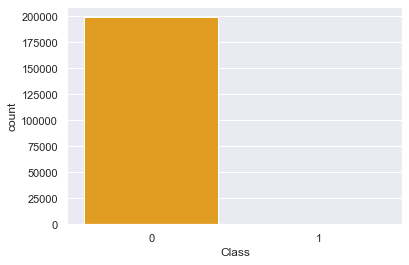

In [46]:
sns.countplot(x = "Class" , data = data_train , color = "orange") 

<Figure size 432x288 with 0 Axes>

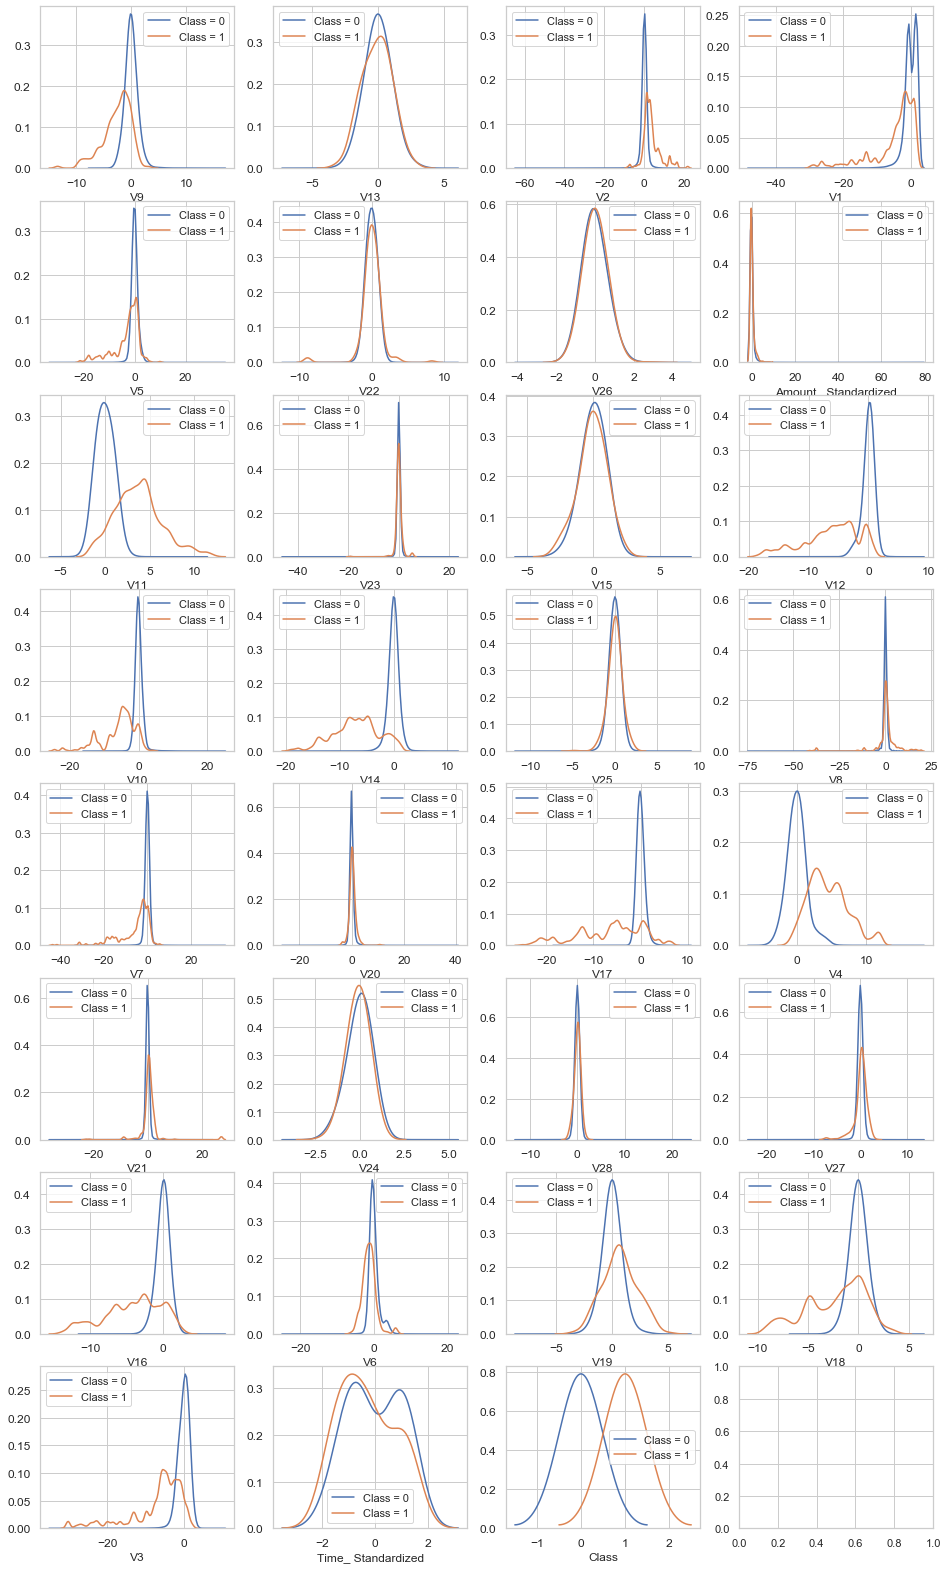

In [47]:
var = data_train.columns.values

i = 0
t0 = data_train.loc[data_train['Class'] == 0]
t1 = data_train.loc[data_train['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

#Credit : https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models

In [1188]:
X_train

,V14,V15,Amount_ Standardized,V17,V16,V24,V4,Time_ Standardized,V1,V22,...,V19,V20,V7,V23,V2,V11,V9,V13,V12,V18
19882,0.076379,0.015495,-0.035142,0.080539,1.249910,0.558421,-0.656490,-1.351726,1.223084,0.463601,...,0.707894,0.214134,-0.508023,-0.092708,-0.711398,1.629016,-1.069472,0.063098,0.159828,-0.939646
28627,-0.775479,0.322808,-0.149367,-0.810085,0.254932,0.420399,-0.792852,-1.257724,-2.738265,0.090349,...,-0.895217,0.205705,0.855199,0.113117,2.172838,-0.165012,1.016380,1.540066,0.845622,-0.599378
252282,0.603560,1.134597,0.357271,0.270279,-2.868543,0.670767,-2.651533,1.282894,1.941172,-0.100191,...,0.238295,-0.288116,0.156930,-0.060454,-1.496964,-0.781103,0.814070,-0.174029,0.309101,1.212992
283094,0.303558,-0.837132,-0.310210,-0.052755,0.660813,-1.235856,-2.460064,1.612113,-10.243984,-1.425127,...,-0.428189,3.406673,-2.164932,0.660345,8.517532,-0.552959,4.803544,0.837591,2.152466,-0.172658
201431,2.856969,0.747486,-0.262553,0.290307,1.390717,0.573510,-0.978949,0.822757,-3.118979,2.958235,...,-1.423249,4.412495,-9.120091,1.255257,2.941044,-0.790111,-1.085996,-1.597984,1.987735,0.487832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-0.812430,0.173482,-0.335238,-0.580398,1.957444,-0.335547,-1.009783,1.361524,2.104735,1.507397,...,0.427254,0.065773,-1.656851,0.149724,-1.127033,0.873711,0.110464,1.510768,0.676295,-0.251647
64162,0.762662,2.043929,-0.347232,1.282341,-1.511864,-0.624707,0.857215,-0.921450,-0.471512,0.977923,...,-1.329392,-0.302997,0.002159,0.093360,1.052641,0.608457,-0.735861,-0.029949,0.563880,-1.935302
174179,0.565906,0.066012,-0.225291,0.648525,-0.023609,-0.874888,-1.422633,0.568462,2.126687,1.293620,...,0.139524,-0.036445,-0.087291,-0.064980,-0.727916,1.142851,-1.239690,0.232185,0.117809,-2.318056
268687,0.499747,0.162736,-0.345313,-0.220575,-0.055036,0.015537,0.429631,1.443060,2.060501,-0.789625,...,0.150298,-0.296357,0.108868,0.354650,-0.131934,-0.924880,0.711137,-1.061793,-0.156386,-0.734568


In [1189]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

# Decision Tree Classfier Model

Traininfg the model 

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [49]:
dt = DecisionTreeClassifier(criterion = "gini", splitter = "best", max_depth = 5) 
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
pred_Y_dtc = dt.predict(X_train)

In [51]:
pred_Y_dtc

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
pred_Y_dtc_proba = dt.predict_proba(X_train)

In [55]:
pred_Y_dtc_proba

array([[9.99693116e-01, 3.06884269e-04],
       [9.99693116e-01, 3.06884269e-04],
       [9.99693116e-01, 3.06884269e-04],
       ...,
       [9.99693116e-01, 3.06884269e-04],
       [9.99693116e-01, 3.06884269e-04],
       [9.99693116e-01, 3.06884269e-04]])

In [53]:
pred_prob = pred_Y_dtc_proba[:,1]

In [54]:
pred_prob

array([0.00030688, 0.00030688, 0.00030688, ..., 0.00030688, 0.00030688,
       0.00030688])

In [1212]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.05):
    y_pred = (pred_Y_dtc_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [1213]:
table

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.001956,1.000000,0.000161,0.001796,1.000000,0.003586
0.05,0.999413,0.818436,0.999739,0.849275,0.818436,0.833570
0.10,0.999544,0.810056,0.999884,0.926518,0.810056,0.864382
0.15,0.999544,0.810056,0.999884,0.926518,0.810056,0.864382
0.20,0.999559,0.807263,0.999905,0.938312,0.807263,0.867868
0.25,0.999599,0.798883,0.999960,0.972789,0.798883,0.877301
0.30,0.999599,0.798883,0.999960,0.972789,0.798883,0.877301
0.35,0.999599,0.798883,0.999960,0.972789,0.798883,0.877301
0.40,0.999599,0.798883,0.999960,0.972789,0.798883,0.877301
0.45,0.999599,0.798883,0.999960,0.972789,0.798883,0.877301


In [1214]:
table.to_csv("table.csv")

In [1215]:
import seaborn as sns

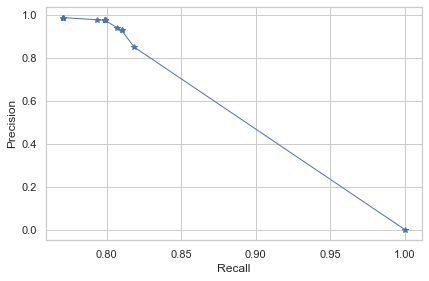

In [1216]:
plt.plot(table.Recall, table.Precision , marker = "*", linewidth = 1)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.style.use("fivethirtyeight")
plt.show()

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

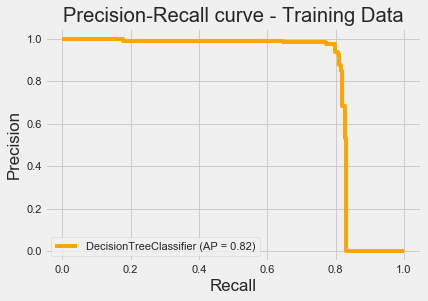

In [1239]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [1217]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [1218]:
# calculate the precision-recall auc
precision, recall, _ = precision_recall_curve(Y_train, pred_prob )
auc_score = auc(recall, precision)
print('Decision Tree AUC: %.3f' % auc_score)

Decision Tree AUC: 0.865


In [1219]:
# Based on the above plot and Table we have picked 0.5 as the threshold

Testing the model on the test data set with our threshold of 0.5

In [1220]:
pred_Y_dtc_test = dt.predict(X_test)

In [1221]:
pred_Y_dtc_test_proba = dt.predict_proba(X_test)

In [1016]:
pred_prob_test = pred_Y_dtc_test_proba[:,1]

In [1222]:
y_test_pred = (pred_prob_test > 0.5).astype(int) # Prediction based on Threshold

In [1223]:
tn, fp, fn, tp = confusion_matrix(Y_test,y_test_pred).ravel()

In [1224]:
tn, fp, fn, tp

(82326, 2983, 61, 73)

In [41]:
pip install mlxtend 

Note: you may need to restart the kernel to use updated packages.


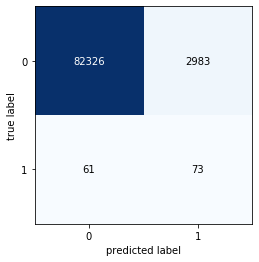

In [42]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

binary1 = np.array([[82326, 2983],[61, 73]])
fig, ax = plot_confusion_matrix(conf_mat=binary1)
plt.show()

In [1237]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [1238]:
get_performance(Y_test,y_test_pred)

(0.9643739100921082, 0.9650329976907478, 0.5447761194029851)

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

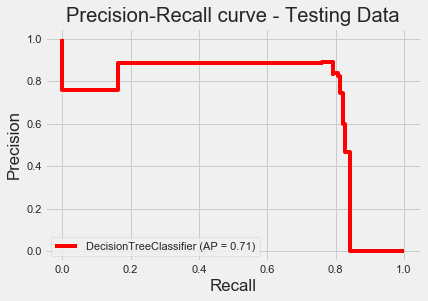

In [1240]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(dt, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

# Discriminant Analysis

In [223]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [224]:
data2 = pd.read_csv("creditcard.csv")

data2.shape

(284807, 31)

In [225]:
data2.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# 31 variables. 
# Time = time of transaction
# Amount = amount of transaction
# Class 0 = genuine transaction; 1 = fraud transaction
# 28 variables which are PCs and appear to have been standadized

In [ ]:
# For LDA to work, there needs to be a difference in the means of the variables for the two clases

In [226]:
# Sort the data
data2.sort_values(by = ['Class'], inplace = True, ascending = False)

In [227]:
data2['Class'].head()

42635     1
135718    1
10568     1
215132    1
144104    1
Name: Class, dtype: int64

In [228]:
data2['Class'].tail()

95068     0
95069     0
95070     0
95071     0
284806    0
Name: Class, dtype: int64

In [229]:
data2 = data2[1:29000]

In [230]:
data2['Class'].value_counts()

0    28508
1      491
Name: Class, dtype: int64

In [231]:
from scipy.stats import ttest_ind

In [232]:
ttest_ind(data2['Time'][1:492], data2['Time'][493:28487])
# significant but based on dataset info, not meaningful.

Ttest_indResult(statistic=-136.4222961323361, pvalue=0.0)

In [233]:
ttest_ind(data2['V1'][1:492], data2['V1'][493:28487])

Ttest_indResult(statistic=-48.445585155616335, pvalue=0.0)

In [234]:
ttest_ind(data2['V2'][1:492], data2['V2'][493:28487])

Ttest_indResult(statistic=46.30998770973765, pvalue=0.0)

In [235]:
ttest_ind(data2['V3'][1:492], data2['V3'][493:28487])

Ttest_indResult(statistic=-83.19732813489497, pvalue=0.0)

In [236]:
ttest_ind(data2['V4'][1:492], data2['V4'][493:28487])

Ttest_indResult(statistic=66.3872038366632, pvalue=0.0)

In [237]:
ttest_ind(data2['V5'][1:492], data2['V5'][493:28487])

Ttest_indResult(statistic=-49.24551793658121, pvalue=0.0)

In [238]:
ttest_ind(data2['V6'][1:492], data2['V6'][493:28487])

Ttest_indResult(statistic=-21.660094177672335, pvalue=3.327410443571559e-103)

In [239]:
ttest_ind(data2['V7'][1:492], data2['V7'][493:28487])

Ttest_indResult(statistic=-81.23418336928817, pvalue=0.0)

In [240]:
ttest_ind(data2['V8'][1:492], data2['V8'][493:28487])

Ttest_indResult(statistic=10.023447638849806, pvalue=1.315757886927142e-23)

In [241]:
ttest_ind(data2['V9'][1:492], data2['V9'][493:28487])

Ttest_indResult(statistic=-51.28855634174827, pvalue=0.0)

In [242]:
ttest_ind(data2['V10'][1:492], data2['V10'][493:28487])

Ttest_indResult(statistic=-101.54641249169684, pvalue=0.0)

In [243]:
ttest_ind(data2['V11'][1:492], data2['V11'][493:28487])

Ttest_indResult(statistic=93.10612762191788, pvalue=0.0)

In [244]:
ttest_ind(data2['V12'][1:492], data2['V12'][493:28487])

Ttest_indResult(statistic=-151.30160597708004, pvalue=0.0)

In [245]:
ttest_ind(data2['V13'][1:492], data2['V13'][493:28487])
#drop p-value > 0.01

Ttest_indResult(statistic=0.561463898060909, pvalue=0.574485752073408)

In [246]:
ttest_ind(data2['V14'][1:492], data2['V14'][493:28487])

Ttest_indResult(statistic=-144.49463485416277, pvalue=0.0)

In [247]:
ttest_ind(data2['V15'][1:492], data2['V15'][493:28487])

Ttest_indResult(statistic=2.821500179035122, pvalue=0.004783268718175482)

In [248]:
ttest_ind(data2['V16'][1:492], data2['V16'][493:28487])

Ttest_indResult(statistic=-88.6390103193259, pvalue=0.0)

In [249]:
ttest_ind(data2['V17'][1:492], data2['V17'][493:28487])

Ttest_indResult(statistic=-124.22962901433306, pvalue=0.0)

In [250]:
ttest_ind(data2['V18'][1:492], data2['V18'][493:28487])

Ttest_indResult(statistic=-54.29451778139112, pvalue=0.0)

In [251]:
ttest_ind(data2['V19'][1:492], data2['V19'][493:28487])

Ttest_indResult(statistic=16.489763404307357, pvalue=8.322468608252016e-61)

In [252]:
ttest_ind(data2['V20'][1:492], data2['V20'][493:28487])

Ttest_indResult(statistic=10.137538734325966, pvalue=4.1368171753203344e-24)

In [253]:
ttest_ind(data2['V21'][1:492], data2['V21'][493:28487])

Ttest_indResult(statistic=16.237117504684917, pvalue=5.076506114795104e-59)

In [254]:
ttest_ind(data2['V22'][1:492], data2['V22'][493:28487])

Ttest_indResult(statistic=-4.015690132762866, pvalue=5.942394819088438e-05)

In [255]:
ttest_ind(data2['V23'][1:492], data2['V23'][493:28487])
#drop p-value > 0.01

Ttest_indResult(statistic=-1.797349543788116, pvalue=0.07229073389679729)

In [256]:
ttest_ind(data2['V24'][1:492], data2['V24'][493:28487])

Ttest_indResult(statistic=-2.8400728687715904, pvalue=0.0045135189357988405)

In [257]:
ttest_ind(data2['V25'][1:492], data2['V25'][493:28487])

Ttest_indResult(statistic=6.264778176274258, pvalue=3.7869174826030243e-10)

In [258]:
ttest_ind(data2['V26'][1:492], data2['V26'][493:28487])

Ttest_indResult(statistic=3.7420601892959513, pvalue=0.00018287600852847898)

In [259]:
ttest_ind(data2['V27'][1:492], data2['V27'][493:28487])

Ttest_indResult(statistic=8.288076022838245, pvalue=1.2009752536039347e-16)

In [260]:
ttest_ind(data2['V28'][1:492], data2['V28'][493:28487])

Ttest_indResult(statistic=4.019171632397782, pvalue=5.855323901816405e-05)

In [261]:
ttest_ind(data2['Amount'][1:492], data2['Amount'][493:28487])
# p-value > 0.01. We should drop this variable from a practical standpoint
# A high $ amount indicates a bigger risk to the company and should be taken into account.

Ttest_indResult(statistic=1.5804670069084334, pvalue=0.1140110607489292)

In [262]:
data2.drop(['Time', 'V13', 'V23'], axis = 1, inplace = True)

In [263]:
data2 = data2[1:29000]

In [264]:
from sklearn.manifold import TSNE

X = data2.drop('Class', axis=1)
y = data2['Class']

In [265]:
#t-SNE

X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

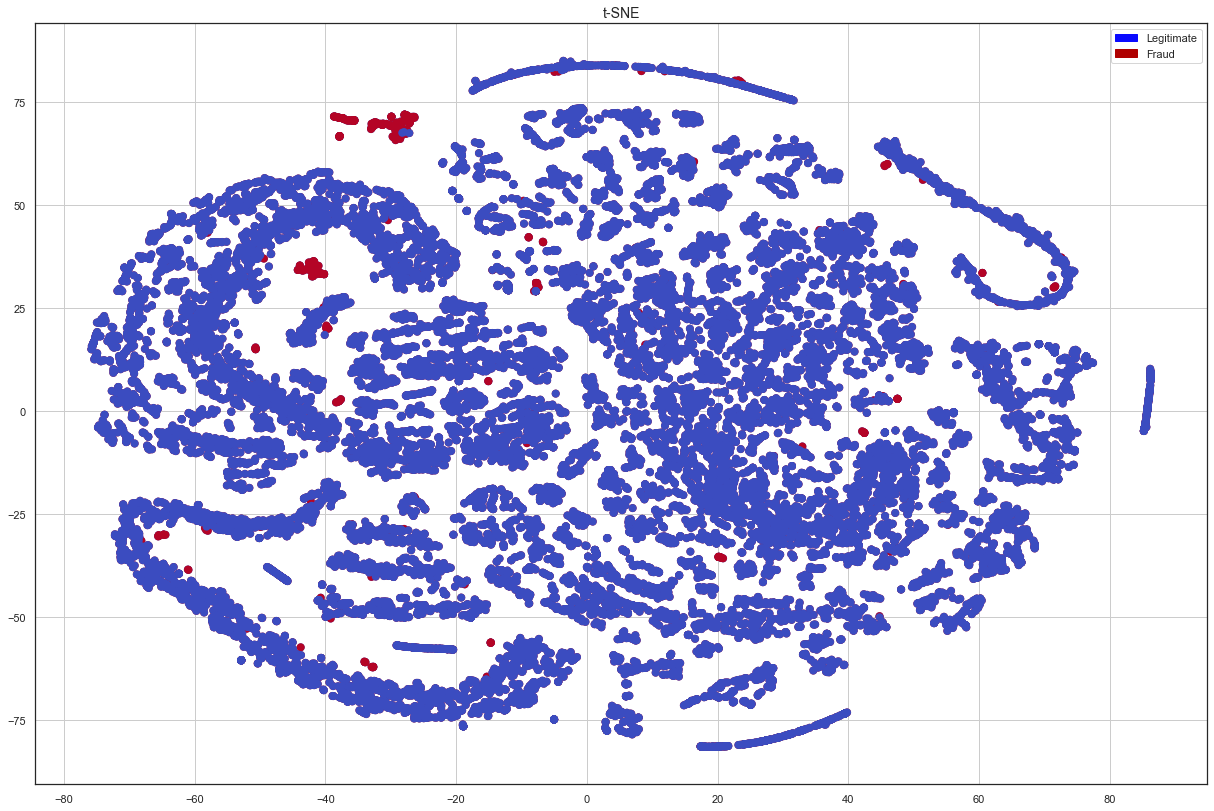

In [266]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(21, 14))


blue_patch = mpatches.Patch(color='#0A0AFF', label='Legitimate')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Legitimate', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [267]:
data2['Class'].value_counts()

0    28508
1      490
Name: Class, dtype: int64

In [268]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [279]:
## training data

datastd = pd.read_csv("data_train_before_smote.csv")


datastd.drop(['Time_ Standardized', 'V13', 'V23'], axis = 1, inplace = True)

X = datastd.drop('Class', axis=1)
y = datastd['Class']

In [280]:
ldam = LinearDiscriminantAnalysis()
ldam.fit(X,y)
ldam.get_params()

{'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [282]:
datapred = pd.read_csv("test_data_set.csv")
datapred.drop(['Time_ Standardized', 'V13', 'V23'], axis = 1, inplace = True)


X_test = datapred.drop('Class', axis=1)
y_test = datapred['Class']

pred = ldam.predict(X_test)
prob = ldam.predict_proba(X_test)

In [283]:
ldam.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [284]:
from sklearn.metrics import precision_recall_curve
y_true = y_test
y_scores = pred


#precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision, recall, threshold = precision_recall_curve(y_true, y_scores)

In [285]:
prt = pd.DataFrame(precision, recall)
prt.to_csv("prt.csv")
print(threshold)

[0 1]


Text(0.5, 1.0, 'Precision-Recall curve: training data')

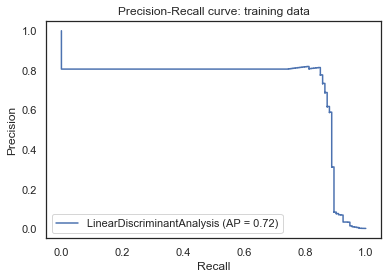

In [286]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(ldam, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve: training data')

Text(0.5, 1.0, 'Precision-Recall curve: test data')

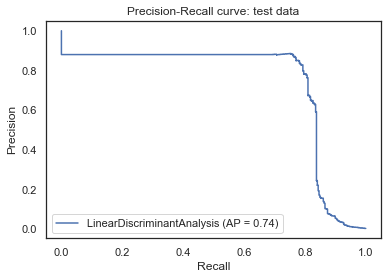

In [287]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(ldam, X, y)
disp.ax_.set_title('Precision-Recall curve: test data')

In [288]:
pred1 = ldam.predict(X)

In [290]:
pred1.shape

(199364,)

In [291]:
y.shape

(199364,)

In [292]:
pred1_new = pd.Series(pred1)

In [293]:
type(pred1_new)

pandas.core.series.Series

In [294]:
type(pred1)

numpy.ndarray

In [295]:
y2 = y.to_numpy()

In [296]:
type(y2)

numpy.ndarray

In [298]:
from sklearn.metrics import precision_recall_curve
y_true = y
y_scores = pred1


#precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision_recall_curve(y2, pred1)


(array([0.00179571, 0.88448845, 1.        ]),
 array([1.        , 0.74860335, 0.        ]),
 array([0, 1], dtype=int64))

In [299]:
prt = pd.DataFrame(precision, recall)
prt.to_csv("prt.csv")
print(threshold)

[0 1]


# Logistic Regression

In [300]:
df22 = pd.read_csv("creditcard.csv")
df22.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [302]:
from sklearn import preprocessing 
numerical_val = list(set(df22[["Time","Amount"]]))
new_col = [i+ "_ Standardized" for i in numerical_val]
array = df22[numerical_val].values
data_scaler = preprocessing.StandardScaler().fit(array)
df22[new_col] = pd.DataFrame(data_scaler.transform(array))

In [303]:
df22.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Time_ Standardized', 'Amount_ Standardized'],
      dtype='object')

In [304]:
df22 = df22.drop(numerical_val, axis =1) 

In [305]:
df22

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_ Standardized,Amount_ Standardized
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,1.641931,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,1.641952,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,1.641974,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,1.641974,-0.313249


In [306]:
df22.mean()

V1                      3.919560e-15
V2                      5.688174e-16
V3                     -8.769071e-15
V4                      2.782312e-15
V5                     -1.552563e-15
V6                      2.010663e-15
V7                     -1.694249e-15
V8                     -1.927028e-16
V9                     -3.137024e-15
V10                     1.768627e-15
V11                     9.170318e-16
V12                    -1.810658e-15
V13                     1.693438e-15
V14                     1.479045e-15
V15                     3.482336e-15
V16                     1.392007e-15
V17                    -7.528491e-16
V18                     4.328772e-16
V19                     9.049732e-16
V20                     5.085503e-16
V21                     1.537294e-16
V22                     7.959909e-16
V23                     5.367590e-16
V24                     4.458112e-15
V25                     1.453003e-15
V26                     1.699104e-15
V27                    -3.660161e-16
V

In [307]:
input_vari3 = list(set(df22.columns)- set(["Class"]))
X3 = df22[input_vari3]
Y3 = df22["Class"]

In [308]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y3, test_size = 0.3, random_state = 60)

In [309]:
X_train3

,V7,V9,V11,V5,V13,V15,V28,V2,V27,V17,...,V24,Time_ Standardized,V26,V22,V14,V16,V10,V1,V8,V18
19882,-0.508023,-1.069472,1.629016,-1.172713,0.063098,0.015495,0.019545,-0.711398,-0.012273,0.080539,...,0.558421,-1.351726,-0.244891,0.463601,0.076379,1.249910,0.770816,1.223084,-0.117419,-0.939646
28627,0.855199,1.016380,-0.165012,-0.580318,1.540066,0.322808,0.376354,2.172838,-0.902677,-0.810085,...,0.420399,-1.257724,0.090911,0.090349,-0.775479,0.254932,1.730961,-2.738265,-0.332107,-0.599378
252282,0.156930,0.814070,-0.781103,-0.549855,-0.174029,1.134597,-0.023058,-1.496964,-0.000465,0.270279,...,0.670767,1.282894,-0.743797,-0.100191,0.603560,-2.868543,-0.450475,1.941172,-0.496164,1.212992
283094,-2.164932,4.803544,-0.552959,-3.135762,0.837591,-0.837132,1.240884,8.517532,2.177236,-0.052755,...,-1.235856,1.612113,0.295328,-1.425127,0.303558,0.660813,8.319900,-10.243984,3.746472,-0.172658
201431,-9.120091,-1.085996,-0.790111,0.423311,-1.597984,0.747486,0.500579,2.941044,-0.005474,0.290307,...,0.573510,0.822757,-0.360751,2.958235,2.856969,1.390717,-4.162672,-3.118979,-16.942606,0.487832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-1.656851,0.110464,0.873711,-1.433077,1.510768,0.173482,-0.043576,-1.127033,0.058842,-0.580398,...,-0.335547,1.361524,-0.102502,1.507397,-0.812430,1.957444,0.854955,2.104735,0.175389,-0.251647
64162,0.002159,-0.735861,0.608457,0.401660,-0.029949,2.043929,-0.030211,1.052641,0.030910,1.282341,...,-0.624707,-0.921450,-0.219312,0.977923,0.762662,-1.511864,-0.551364,-0.471512,0.840939,-1.935302
174179,-0.087291,-1.239690,1.142851,1.135523,0.232185,0.066012,-0.098112,-0.727916,-0.041218,0.648525,...,-0.874888,0.568462,0.158558,1.293620,0.565906,-0.023609,0.948242,2.126687,0.052156,-2.318056
268687,0.108868,0.711137,-0.924880,-0.248828,-1.061793,0.162736,-0.062229,-0.131934,-0.078106,-0.220575,...,0.015537,1.443060,0.199131,-0.789625,0.499747,-0.055036,0.106223,2.060501,-0.271768,-0.734568


In [310]:
 Y_train3

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

# Logit Model

In [311]:
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [313]:
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train3, Y_train3)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [314]:
pred_Y_lr = lr.predict(X_train3)

In [315]:
pred_Y_lr_proba = lr.predict_proba(X_train3)

In [316]:
pred_prob = pred_Y_lr_proba[:,1]

In [317]:
col_names = ["Accuracy","Sensitivity", "Specificity", "Precision","Recall", "FMeasure"]
table = pd.DataFrame(columns = col_names)
for i in np.arange(0,1,0.01):
    y_pred = (pred_Y_lr_proba [:,1] > i).astype(int)
    tn, fp, fn, tp = confusion_matrix(Y_train3,y_pred).ravel()
    Accuracy = (tp+tn)/(tp+fp+fn+tn)
    Sensitivity = tp/(tp+fn)
    Specificity =tn/(tn+fp)
    Precision = tp/(tp+fp)
    Recall = tp/(fn+tp)
    FMeasure = (2*Precision*Recall) /(Precision+Recall)
    table.loc[i] =[Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure]

In [318]:
table

,Accuracy,Sensitivity,Specificity,Precision,Recall,FMeasure
0.00,0.001796,1.000000,0.000000,0.001796,1.000000,0.003585
0.01,0.996444,0.843575,0.996719,0.316230,0.843575,0.460015
0.02,0.998596,0.835196,0.998889,0.575000,0.835196,0.681093
0.03,0.998937,0.835196,0.999231,0.661504,0.835196,0.738272
0.04,0.999092,0.818436,0.999417,0.716381,0.818436,0.764016
...,...,...,...,...,...,...
0.95,0.998967,0.477654,0.999905,0.900000,0.477654,0.624088
0.96,0.998952,0.469274,0.999905,0.898396,0.469274,0.616514
0.97,0.998927,0.455307,0.999905,0.895604,0.455307,0.603704
0.98,0.998896,0.438547,0.999905,0.892045,0.438547,0.588015


Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

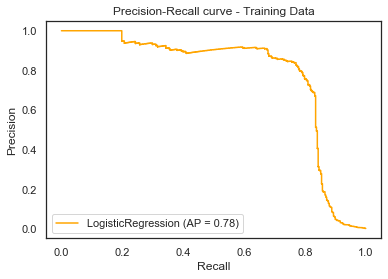

In [319]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_train3, Y_train3, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [320]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [321]:
precision, recall, threshold = precision_recall_curve(Y_train3,pred_Y_lr)

In [322]:
precision, recall, threshold

(array([0.00179571, 0.91221374, 1.        ]),
 array([1.        , 0.66759777, 0.        ]),
 array([0, 1], dtype=int64))

In [323]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [324]:
precision, recall, _ = precision_recall_curve(Y_train3, pred_prob )
auc_score = auc(recall, precision)
print('Logistic Regression AUC: %.3f' % auc_score)

Logistic Regression AUC: 0.780


In [325]:
pred_Y_lr_test = lr.predict(X_test3)

In [326]:
pred_Y_lr_test_proba = lr.predict_proba(X_test3)

In [327]:
pred_prob_test = pred_Y_lr_test_proba[:,1]

In [328]:
tn, fp, fn, tp = confusion_matrix(Y_test3,pred_Y_lr_test).ravel()

In [329]:
tn, fp, fn, tp

(85281, 28, 43, 91)

In [330]:
precision1, recall2, threshold3 = precision_recall_curve(Y_test3,pred_Y_lr_test)

In [331]:
precision1, recall2, threshold3

(array([0.0015683 , 0.76470588, 1.        ]),
 array([1.        , 0.67910448, 0.        ]),
 array([0, 1], dtype=int64))

Text(0.5, 1.0, 'Precision-Recall curve - Test Data')

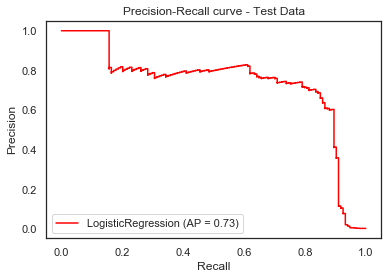

In [332]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr, X_test3, Y_test3, color = "red")
disp.ax_.set_title('Precision-Recall curve - Test Data') 
#Precision vs Recall Curve for Test

# KNN Without SMOTE 

In [3]:
df4 = pd.read_csv('creditcard.csv')
# drop time and Amount - the non PCA features
df4.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
from sklearn.model_selection import train_test_split
vars_in = list(set(df4.columns)- set(["Class"]))
X4 = df4[vars_in]
Y4 = df4["Class"]

In [5]:
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y4, test_size = 0.3, random_state = 60)

In [6]:
X_train4

,V7,V15,V6,V18,V21,V26,V25,V12,V24,V19,...,V5,V22,V13,V11,V3,Time,V10,V17,V4,V20
19882,-0.508023,0.015495,-0.849912,-0.939646,0.252644,-0.244891,0.414817,0.159828,0.558421,0.707894,...,-1.172713,0.463601,0.063098,1.629016,0.450127,30623.0,0.770816,0.080539,-0.656490,0.214134
28627,0.855199,0.322808,-0.944462,-0.599378,-0.060815,0.090911,-0.057352,0.845622,0.420399,-0.895217,...,-0.580318,0.090349,1.540066,-0.165012,0.169687,35087.0,1.730961,-0.810085,-0.792852,0.205705
252282,0.156930,1.134597,-1.438944,1.212992,-0.146344,-0.743797,0.297133,0.309101,0.670767,0.238295,...,-0.549855,-0.100191,-0.174029,-0.781103,-2.307854,155736.0,-0.450475,0.270279,-2.651533,-0.288116
283094,-2.164932,-0.837132,-1.112216,-0.172658,-0.996068,0.295328,1.492283,2.152466,-1.235856,-0.428189,...,-3.135762,-1.425127,0.837591,-0.552959,-6.591644,171370.0,8.319900,-0.052755,-2.460064,3.406673
201431,-9.120091,0.747486,7.801221,0.487832,-8.728597,-0.360751,-0.018582,1.987735,0.573510,-1.423249,...,0.423311,2.958235,-1.597984,-0.790111,-2.184592,133885.0,-4.162672,0.290307,-0.978949,4.412495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-1.656851,0.173482,0.113723,-0.251647,0.488025,-0.102502,-0.403562,0.676295,-0.335547,0.427254,...,-1.433077,1.507397,1.510768,0.873711,0.234969,159470.0,0.854955,-0.580398,-1.009783,0.065773
64162,0.002159,2.043929,0.985436,-1.935302,0.310285,-0.219312,-0.495253,0.563880,-0.624707,-1.329392,...,0.401660,0.977923,-0.029949,0.608457,0.739050,51056.0,-0.551364,1.282341,0.857215,-0.302997
174179,-0.087291,0.066012,0.750053,-2.318056,0.442502,0.158558,0.315080,0.117809,-0.874888,0.139524,...,1.135523,1.293620,0.232185,1.142851,-2.583758,121809.0,0.948242,0.648525,-1.422633,-0.036445
268687,0.108868,0.162736,-1.245778,-0.734568,-0.301496,0.199131,-0.337683,-0.156386,0.015537,0.150298,...,-0.248828,-0.789625,-1.061793,-0.924880,-1.084477,163342.0,0.106223,-0.220575,0.429631,-0.296357


In [7]:
Y_train4

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [8]:
X4= pd.DataFrame(X_train4, columns = vars_in)
Y4 = pd.DataFrame(Y_train4, columns = ["Class"])
data_train4 = pd.concat([X4,Y4], axis = 1)

In [344]:
data_train4.shape

(199364, 31)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train4, Y_train4)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [10]:
knn.fit

<bound method SupervisedIntegerMixin.fit of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')>

In [11]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [13]:
pred_Y_knn = knn.predict(X_test4)

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test4, pred_Y_knn)

In [16]:
accuracy_knn

0.9985019252601149

In [17]:
sensitivity_knn

0.999988277907372

In [18]:
specificity_knn

0.05223880597014925

In [20]:
con_mat = confusion_matrix(Y_test4, pred_Y_knn)

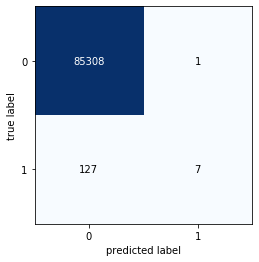

In [21]:
fig,ax=plot_confusion_matrix(con_mat)
plt.show()

In [22]:
pred_Y_knn1 = knn.predict(X_train4)


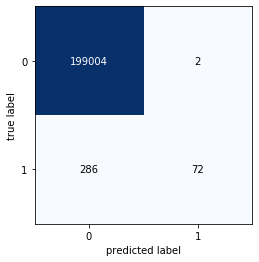

In [23]:
con_mat1 = confusion_matrix(Y_train4, pred_Y_knn1)
fig,ax=plot_confusion_matrix(con_mat1)
plt.show()

In [24]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [25]:
perf = pd.DataFrame([accuracy_knn], 
                    columns = ['accuracy'], 
                    index = ['K-NN'])

perf['sensitivity'] = np.asarray([sensitivity_knn])

perf['specificity'] = np.asarray([ specificity_knn])

perf

,accuracy,sensitivity,specificity
K-NN,0.998502,0.999988,0.052239


In [26]:
from mlxtend.plotting import plot_confusion_matrix

In [27]:
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train4,Y_train4)
    pred_Y_knn = knn.predict(X_test4)
    error_rate.append(np.mean(pred_Y_knn != Y_test4))

In [28]:
print(error_rate)

[0.0018140748803295765, 0.0015097784487904217, 0.0014980747398850695, 0.0015214821576957738, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.00155659328441183, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.001533185866601126, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823, 0.0015682969933171823]


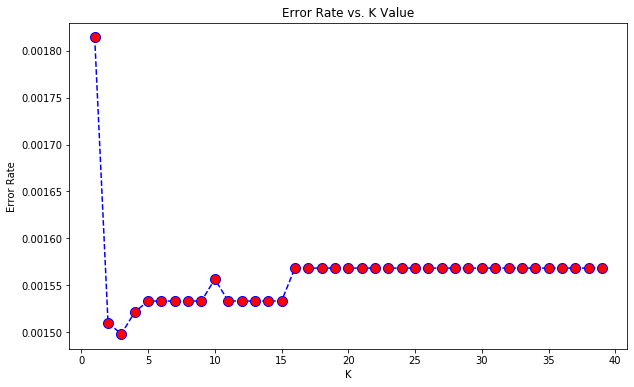

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'b',linestyle='dashed', marker='o',markerfacecolor='r', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

# KNN With SMOTE 

In [30]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE 

In [33]:
os = SMOTE(random_state=0)
vars_in = list(set(data_train4.columns)- set(["Class"]))

In [ ]:
X5, Y5 = os.fit_sample(data_train4[vars_in], data_train4['Class'])

In [35]:
X6= pd.DataFrame(X5, columns = vars_in)
Y6 = pd.DataFrame(Y5, columns = ["Class"])
data_train5 = pd.concat([X6,Y6], axis = 1)

In [36]:
data_train5.shape

(398012, 31)

In [37]:
input_new = set(data_train5.columns) - set(["Class"])
X_new = data_train5[input_new]
Y_new = data_train5["Class"]

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_new, Y_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [39]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [40]:
pred_y_knn = knn.predict(X_test4)

In [41]:
accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test4, pred_y_knn)

In [42]:
accuracy_knn


0.9519796823613403

In [43]:
sensitivity_knn

0.9526075795050932

In [44]:
specificity_knn

0.5522388059701493

In [45]:
c_mat = confusion_matrix(Y_test4, pred_y_knn)

In [60]:
pred_y_knn2 = knn.predict(X_new)

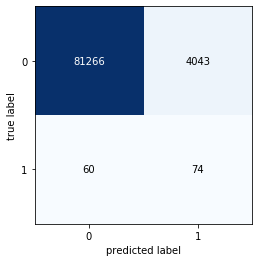

In [47]:
fig,ax=plot_confusion_matrix(c_mat)
plt.show()

In [48]:
error_rate = []
# Will take some time
for i in range(1,40):
 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_new,Y_new)
    pred_y_knn = knn.predict(X_test4)
    error_rate.append(np.mean(pred_y_knn != Y_test4))

In [49]:
Y_test4[Y_test4==1]

16863     1
12070     1
42609     1
30496     1
52521     1
         ..
6774      1
248971    1
39183     1
79883     1
151462    1
Name: Class, Length: 134, dtype: int64

In [50]:
error_rate

[0.03213838465409688,
 0.02511615931088562,
 0.048020317638659694,
 0.03952342497337406,
 0.058471729691139125,
 0.04996313331694814,
 0.06640684432896785,
 0.058752618704867574,
 0.07413129220650023,
 0.06661751108926418,
 0.0794681834673408,
 0.07235232845288672,
 0.08523811195767939,
 0.07800521985417179,
 0.08959189167047037,
 0.08307292581018925,
 0.09351263415376333,
 0.08749692777641234,
 0.0972344135856653,
 0.09155811476656953,
 0.10090937818194586,
 0.0950575237292698,
 0.10423323151106585,
 0.09900167363037346,
 0.10732301066207882,
 0.10216167503481853,
 0.11014360450826867,
 0.10541530611050642,
 0.11317486511475487,
 0.10843486300808726,
 0.11603057008766078,
 0.1114076050700467,
 0.11850005266669007,
 0.11404093957375092,
 0.12123872055054247,
 0.11667427407745515,
 0.1236730920028557,
 0.11927249745444331,
 0.12607235232845287]

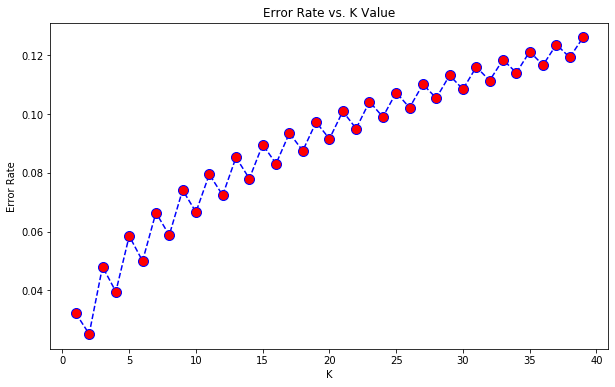

In [51]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'b',linestyle='dashed', marker='o',markerfacecolor='r', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [52]:
c_mat1 = confusion_matrix(Y_new, pred_y_knn2)

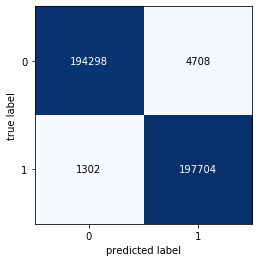

In [53]:
fig,ax=plot_confusion_matrix(c_mat1)
plt.show()

In [94]:
from sklearn.metrics import precision_recall_curve
y_true = Y_test4
y_scores = pred_y_knn


#precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision, recall, threshold = precision_recall_curve(y_true, y_scores)

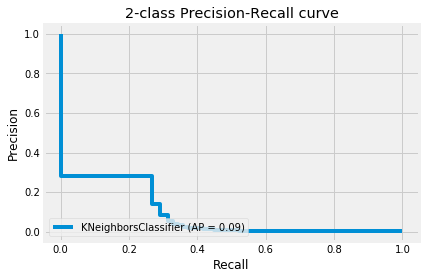

In [95]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(knn, X_test4, Y_test4)
disp.ax_.set_title('2-class Precision-Recall curve')
precision, recall, threshold = precision_recall_curve(Y_test4, pred_y_knn)

In [61]:
from sklearn.metrics import precision_recall_curve
y_true = Y_new
y_scores = pred_y_knn2


#precision, recall, threshold = precision_recall_curve(y_true, y_scores)
precision, recall, threshold = precision_recall_curve(y_true, y_scores)

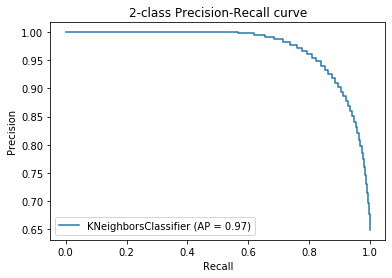

In [63]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(knn, X_new, Y_new)
disp.ax_.set_title('2-class Precision-Recall curve')
precision, recall, threshold = precision_recall_curve(Y_new, pred_y_knn2)

In [96]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [97]:
precision, recall, threshold = precision_recall_curve(Y_test4,pred_y_knn)

In [98]:
precision, recall, threshold

(array([0.0015683 , 0.00649471, 1.        ]),
 array([1.        , 0.52238806, 0.        ]),
 array([0, 1], dtype=int64))

# Random Forest

In [64]:
import pandas as pd
import numpy as np
import scipy as sp 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
# suppressing warnings
import warnings
warnings.filterwarnings('ignore')

In [65]:
data = pd.read_csv("creditcard.csv")

In [66]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
from sklearn import preprocessing 
numerical_val = list(set(data[["Time","Amount"]]))
new_col = [i+ "_ Standardized" for i in numerical_val]
array = data[numerical_val].values
data_scaler = preprocessing.StandardScaler().fit(array)
data[new_col] = pd.DataFrame(data_scaler.transform(array))
data = data.drop(numerical_val, axis =1) 

In [68]:
data.mean()

V1                      3.919560e-15
V2                      5.688174e-16
V3                     -8.769071e-15
V4                      2.782312e-15
V5                     -1.552563e-15
V6                      2.010663e-15
V7                     -1.694249e-15
V8                     -1.927028e-16
V9                     -3.137024e-15
V10                     1.768627e-15
V11                     9.170318e-16
V12                    -1.810658e-15
V13                     1.693438e-15
V14                     1.479045e-15
V15                     3.482336e-15
V16                     1.392007e-15
V17                    -7.528491e-16
V18                     4.328772e-16
V19                     9.049732e-16
V20                     5.085503e-16
V21                     1.537294e-16
V22                     7.959909e-16
V23                     5.367590e-16
V24                     4.458112e-15
V25                     1.453003e-15
V26                     1.699104e-15
V27                    -3.660161e-16
V

In [69]:
input_vari = list(set(data.columns)- set(["Class"]))
X = data[input_vari]
Y = data["Class"]

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state = 60)

In [72]:
X_train

,V7,V15,V6,V18,V21,V26,V25,V12,V24,Amount_ Standardized,...,V16,V5,V22,V13,V11,V3,V10,V17,V4,V20
19882,-0.508023,0.015495,-0.849912,-0.939646,0.252644,-0.244891,0.414817,0.159828,0.558421,-0.035142,...,1.249910,-1.172713,0.463601,0.063098,1.629016,0.450127,0.770816,0.080539,-0.656490,0.214134
28627,0.855199,0.322808,-0.944462,-0.599378,-0.060815,0.090911,-0.057352,0.845622,0.420399,-0.149367,...,0.254932,-0.580318,0.090349,1.540066,-0.165012,0.169687,1.730961,-0.810085,-0.792852,0.205705
252282,0.156930,1.134597,-1.438944,1.212992,-0.146344,-0.743797,0.297133,0.309101,0.670767,0.357271,...,-2.868543,-0.549855,-0.100191,-0.174029,-0.781103,-2.307854,-0.450475,0.270279,-2.651533,-0.288116
283094,-2.164932,-0.837132,-1.112216,-0.172658,-0.996068,0.295328,1.492283,2.152466,-1.235856,-0.310210,...,0.660813,-3.135762,-1.425127,0.837591,-0.552959,-6.591644,8.319900,-0.052755,-2.460064,3.406673
201431,-9.120091,0.747486,7.801221,0.487832,-8.728597,-0.360751,-0.018582,1.987735,0.573510,-0.262553,...,1.390717,0.423311,2.958235,-1.597984,-0.790111,-2.184592,-4.162672,0.290307,-0.978949,4.412495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260257,-1.656851,0.173482,0.113723,-0.251647,0.488025,-0.102502,-0.403562,0.676295,-0.335547,-0.335238,...,1.957444,-1.433077,1.507397,1.510768,0.873711,0.234969,0.854955,-0.580398,-1.009783,0.065773
64162,0.002159,2.043929,0.985436,-1.935302,0.310285,-0.219312,-0.495253,0.563880,-0.624707,-0.347232,...,-1.511864,0.401660,0.977923,-0.029949,0.608457,0.739050,-0.551364,1.282341,0.857215,-0.302997
174179,-0.087291,0.066012,0.750053,-2.318056,0.442502,0.158558,0.315080,0.117809,-0.874888,-0.225291,...,-0.023609,1.135523,1.293620,0.232185,1.142851,-2.583758,0.948242,0.648525,-1.422633,-0.036445
268687,0.108868,0.162736,-1.245778,-0.734568,-0.301496,0.199131,-0.337683,-0.156386,0.015537,-0.345313,...,-0.055036,-0.248828,-0.789625,-1.061793,-0.924880,-1.084477,0.106223,-0.220575,0.429631,-0.296357


In [73]:
Y_train

19882     0
28627     0
252282    0
283094    0
201431    0
         ..
260257    0
64162     0
174179    0
268687    0
241222    0
Name: Class, Length: 199364, dtype: int64

In [74]:
X_test

,V7,V15,V6,V18,V21,V26,V25,V12,V24,Amount_ Standardized,...,V16,V5,V22,V13,V11,V3,V10,V17,V4,V20
259433,-0.317032,-0.299823,1.581294,0.170294,0.578154,-0.119337,0.242397,0.247109,-0.044021,-0.121420,...,-1.728057,-0.689090,0.207495,0.165142,-1.453601,3.110827,0.223917,0.973462,2.324735,0.115547
227002,1.457932,0.506785,-0.346329,-1.589495,0.448833,-0.135713,0.733008,-0.317460,-0.977931,-0.287341,...,-2.026251,1.961462,1.455308,-1.409582,-0.547704,-0.865200,-0.911713,0.834809,-0.848797,-0.401661
251070,0.203307,-1.577461,-0.025683,-0.720885,0.101600,0.095659,0.141246,0.371409,0.007766,-0.262273,...,0.348085,0.322487,0.491255,0.751318,-1.295457,-0.508213,1.339440,-0.499158,3.947951,-0.228282
139521,-2.390253,2.329116,-0.320048,-1.235610,0.506660,0.134819,0.013191,-0.961439,-0.679217,0.518353,...,-1.895343,1.448666,0.686935,-0.035951,0.523432,2.122701,0.961597,2.075954,-0.809990,0.943083
200788,0.755034,-0.689785,-0.764345,0.263638,0.255365,0.713796,0.695226,-0.359194,0.145565,-0.313249,...,-0.318070,1.153068,0.762966,-1.896512,0.020210,-2.793449,0.483912,-0.509998,0.176678,-0.293807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157536,-0.113620,-0.405404,-0.617706,1.013496,0.155445,-0.509975,0.248627,-2.167954,0.692834,-0.349231,...,-0.057697,0.188332,0.745847,0.354799,1.747279,-1.286251,-0.264322,0.025224,0.298705,-0.340792
42920,0.026948,1.243708,-0.822739,-0.832018,0.033700,0.514849,0.368969,0.017113,0.439919,-0.353189,...,-0.219660,-0.420841,0.143778,-0.669037,0.085181,0.348119,-0.062607,0.091964,0.579985,-0.193914
26195,-0.785410,0.426360,-0.270753,-0.219903,0.244730,-0.518699,-1.290582,0.412283,0.084404,-0.313289,...,-0.608182,0.540870,0.702957,0.128284,-0.766117,1.864177,-0.244151,0.222752,1.379820,0.182743
84510,-0.133083,0.714861,-0.290401,-0.174180,-0.214057,0.108652,0.091323,0.674040,-0.039302,-0.335278,...,0.413178,-0.184162,-0.656455,-0.505368,1.744074,0.281367,-0.140746,0.057213,0.535220,-0.136052


In [75]:
Y_test

259433    0
227002    0
251070    0
139521    0
200788    0
         ..
157536    0
42920     0
26195     0
84510     0
29917     0
Name: Class, Length: 85443, dtype: int64

In [76]:
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y)
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity = cm[1,1]/(cm[1,0]+cm[1,1])
    return accuracy, sensitivity, specificity

In [77]:
rf1 = RandomForestClassifier(n_estimators=2, max_depth=5, random_state=0)
rf1.fit(X_train, Y_train)

rf2 = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
rf2.fit(X_train, Y_train)

rf3 = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=0)
rf3.fit(X_train, Y_train)

rf4 = RandomForestClassifier(n_estimators=20, max_depth=5, random_state=0)
rf4.fit(X_train, Y_train)

rf5 = RandomForestClassifier(n_estimators=25, max_depth=5, random_state=0)
rf5.fit(X_train, Y_train)

rf6 = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=0)
rf6.fit(X_train, Y_train)

rf7 = RandomForestClassifier(n_estimators=35, max_depth=5, random_state=0)
rf7.fit(X_train, Y_train)

rf8 = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=0)
rf8.fit(X_train, Y_train)

rf9 = RandomForestClassifier(n_estimators=45, max_depth=5, random_state=0)
rf9.fit(X_train, Y_train)

rf10 = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
rf10.fit(X_train, Y_train)

rf11 = RandomForestClassifier(n_estimators=75, max_depth=5, random_state=0)
rf11.fit(X_train, Y_train)

rf12 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf12.fit(X_train, Y_train)

rf13 = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=0)
rf13.fit(X_train, Y_train)

rf14 = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=0)
rf14.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [78]:
pred_Y_rf1 = rf1.predict(X_test)
pred_Y_rf2 = rf2.predict(X_test)
pred_Y_rf3 = rf3.predict(X_test)
pred_Y_rf4 = rf4.predict(X_test)
pred_Y_rf5 = rf5.predict(X_test)
pred_Y_rf6 = rf6.predict(X_test)
pred_Y_rf7 = rf7.predict(X_test)
pred_Y_rf8 = rf8.predict(X_test)
pred_Y_rf9 = rf9.predict(X_test)
pred_Y_rf10 = rf10.predict(X_test)
pred_Y_rf11 = rf11.predict(X_test)
pred_Y_rf12 = rf12.predict(X_test)
pred_Y_rf13 = rf13.predict(X_test)
pred_Y_rf14 = rf14.predict(X_test)

In [79]:
accuracy_rf1, sensitivity_rf1, specificity_rf1 = get_performance(Y_test, pred_Y_rf1)
accuracy_rf2, sensitivity_rf2, specificity_rf2 = get_performance(Y_test, pred_Y_rf2)
accuracy_rf3, sensitivity_rf3, specificity_rf3 = get_performance(Y_test, pred_Y_rf3)
accuracy_rf4, sensitivity_rf4, specificity_rf4 = get_performance(Y_test, pred_Y_rf4)
accuracy_rf5, sensitivity_rf5, specificity_rf5 = get_performance(Y_test, pred_Y_rf5)
accuracy_rf6, sensitivity_rf6, specificity_rf6 = get_performance(Y_test, pred_Y_rf6)
accuracy_rf7, sensitivity_rf7, specificity_rf7 = get_performance(Y_test, pred_Y_rf7)
accuracy_rf8, sensitivity_rf8, specificity_rf8 = get_performance(Y_test, pred_Y_rf8)
accuracy_rf9, sensitivity_rf9, specificity_rf9 = get_performance(Y_test, pred_Y_rf9)
accuracy_rf10, sensitivity_rf10, specificity_rf10 = get_performance(Y_test, pred_Y_rf10)
accuracy_rf11, sensitivity_rf11, specificity_rf11 = get_performance(Y_test, pred_Y_rf11)
accuracy_rf12, sensitivity_rf12, specificity_rf12 = get_performance(Y_test, pred_Y_rf12)
accuracy_rf13, sensitivity_rf13, specificity_rf13 = get_performance(Y_test, pred_Y_rf13)
accuracy_rf14, sensitivity_rf14, specificity_rf14 = get_performance(Y_test, pred_Y_rf14)

In [80]:
perf2 = pd.DataFrame([accuracy_rf1, accuracy_rf2,accuracy_rf3,accuracy_rf4, accuracy_rf5, accuracy_rf6, 
                      accuracy_rf7, accuracy_rf8, accuracy_rf9, accuracy_rf10, accuracy_rf11, accuracy_rf12, 
                      accuracy_rf13,accuracy_rf14], 
                    columns = ['accuracy'], 
                    index = ["RF-1","RF-2","RF-3","RF-4","RF-5","RF-6","RF-7","RF-8","RF-9","RF-10","RF-11","RF-12","RF-13","RF-14",])

perf2['sensitivity'] = np.asarray([sensitivity_rf1,sensitivity_rf2,sensitivity_rf3,sensitivity_rf4,sensitivity_rf5,
                                  sensitivity_rf6, sensitivity_rf7, sensitivity_rf8, sensitivity_rf9, sensitivity_rf10,
                                  sensitivity_rf11,sensitivity_rf12, sensitivity_rf13, sensitivity_rf14])

perf2['specificity'] = np.asarray([specificity_rf1,specificity_rf2, specificity_rf3, specificity_rf4, specificity_rf5,
                                  specificity_rf6,specificity_rf7, specificity_rf8, specificity_rf9, specificity_rf10,
                                   specificity_rf11, specificity_rf12,specificity_rf13, specificity_rf14])

perf2["e"] = np.asarray([2, 10, 15, 20, 25, 30, 35, 40, 45, 50, 75, 100, 150, 200])

perf2

,accuracy,sensitivity,specificity,e
RF-1,0.999356,0.999695,0.783582,2
RF-2,0.999485,0.999871,0.753731,10
RF-3,0.999497,0.999883,0.753731,15
RF-4,0.999473,0.999871,0.746269,20
RF-5,0.999450,0.999848,0.746269,25
RF-6,0.999450,0.999859,0.738806,30
RF-7,0.999462,0.999859,0.746269,35
RF-8,0.999462,0.999859,0.746269,40
RF-9,0.999473,0.999859,0.753731,45
RF-10,0.999473,0.999859,0.753731,50


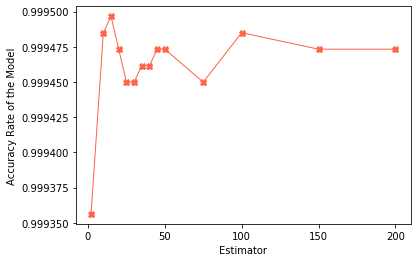

In [81]:
plt.plot(perf2.e,perf2.accuracy, color = "tomato", marker = "X", linewidth = 1)
plt.xlabel("Estimator")
plt.ylabel("Accuracy Rate of the Model")
plt.style.use("fivethirtyeight")
plt.show()

In [ ]:
# n_estimators = 100 
# This is the number of trees you want to build before taking the maximum voting or averages of predictions. 
# Higher number of trees give you better performance but makes your code slower. 
# You should choose as high value as your processor can handle because this makes your predictions stronger and more stable.
# Here The curve becomes uniform at 100

In [82]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [84]:
pred_Y_rf_train = rf.predict(X_train)

Text(0.5, 1.0, 'Precision-Recall curve - Training Data')

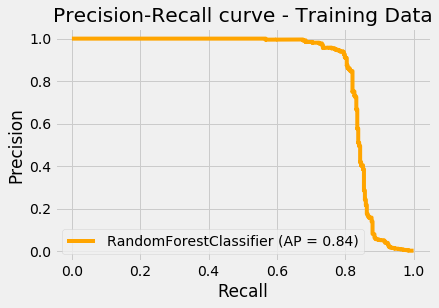

In [85]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_train, Y_train, color = "orange")
disp.ax_.set_title('Precision-Recall curve - Training Data') 
#Precision vs Recall Curve for Train

In [86]:
precision, recall, threshold = precision_recall_curve(Y_train,pred_Y_rf_train)

In [87]:
precision, recall, threshold

(array([0.00179571, 0.95683453, 1.        ]),
 array([1.        , 0.74301676, 0.        ]),
 array([0, 1], dtype=int64))

In [88]:
pred_Y_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Precision-Recall curve - Testing Data')

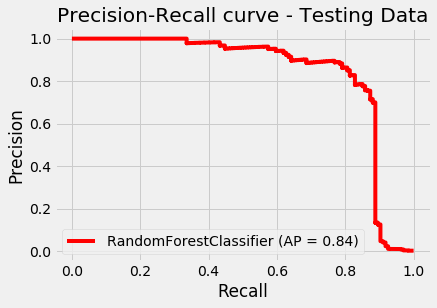

In [89]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(rf, X_test, Y_test, color = "red")
disp.ax_.set_title('Precision-Recall curve - Testing Data') 
#Precision vs Recall Curve for Test

In [90]:
precision, recall, threshold = precision_recall_curve(Y_test,pred_Y_rf)

In [91]:
precision, recall, threshold

(array([0.0015683 , 0.89473684, 1.        ]),
 array([1.        , 0.76119403, 0.        ]),
 array([0, 1], dtype=int64))

In [92]:
import pandas as pd
feature_imp = pd.Series(rf.feature_importances_,index=X_train.columns.values).sort_values(ascending=False)
feature_imp

V14                     0.178368
V12                     0.177917
V17                     0.170351
V10                     0.093763
V16                     0.079570
V11                     0.075561
V18                     0.039380
V4                      0.023637
V9                      0.023415
V7                      0.022888
V3                      0.015120
V20                     0.011145
V6                      0.011038
V26                     0.009566
V5                      0.008059
V2                      0.006632
V27                     0.006184
V21                     0.006011
V1                      0.005367
V8                      0.004958
V28                     0.004849
V19                     0.004478
V22                     0.004373
Time_ Standardized      0.003615
V24                     0.002850
V25                     0.002778
Amount_ Standardized    0.002643
V15                     0.002533
V13                     0.001997
V23                     0.000953
dtype: flo

No handles with labels found to put in legend.


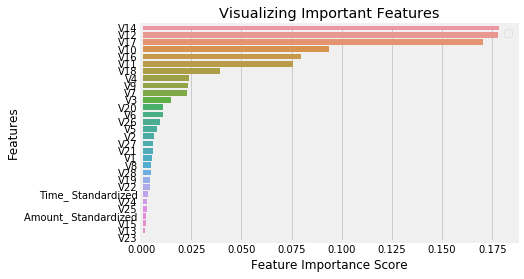

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()